In [2]:
# pip install pandas matplotlib basemap geopandas
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from io import StringIO
import os
import time
import requests
from selenium.webdriver.chrome.options import Options

from datetime import date, timedelta
from IPython.core.display import HTML

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup


C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
import requests
api_key = '52907c12211a4c4:tb36co5d1u5rv2l'
url = f'https://api.tradingeconomics.com/calendar?c={api_key}'
data = requests.get(url).json()
print(data)


import tradingeconomics as te
te.login('52907c12211a4c4:tb36co5d1u5rv2l')
te.getCalendarData()

In [6]:
url = 'https://tradingeconomics.com/country-list/rating'
driver  = webdriver.Chrome()        
driver.get( url )

driver.maximize_window()

In [7]:
driver.maximize_window()

In [22]:


# Set up your WebDriver (make sure to replace with your actual path and WebDriver)
driver = driver = webdriver.Chrome()
# webdriver.Chrome(executable_path='path_to_chromedriver')

# Navigate to the page
driver.get('https://tradingeconomics.com/country-list/rating')

# Find the element using XPath
data_element = driver.find_element( By.XPATH,  '//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody' )

# Get the HTML of the element
data_html = data_element.get_attribute('outerHTML')

# Parse with BeautifulSoup
soup = BeautifulSoup(data_html, 'html.parser')
table = soup.find('table')

if table:
    # Use pandas to read the HTML table
    df = pd.read_html(str(table))[0]
    print(df.head())
else:
    print("No table found in the HTML provided")

# Don't forget to close the driver after your task is complete
driver.quit()


No table found in the HTML provided


In [20]:
data = driver.find_element(By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody')
data_tab = data.get_attribute( 'outerHTML' )
table_html_io = StringIO( data_tab )
table_html_io
# table_df      = pd.read_html( table_html_io )
# table_df.head(5)


soup = BeautifulSoup(data_tab, 'html.parser')

# Find the table
table = soup.find('table')
if table:
    # Convert table to string and then read it into a DataFrame
    table_str = str(table)
    table_df = pd.read_html(StringIO(table_str))[0]
    print(table_df.head())
else:
    print("No table found")


print(data)

No table found
<selenium.webdriver.remote.webelement.WebElement (session="a35ef7e43654379de2d1dce52be36d65", element="f.80097F0583BC0CFA1C140D390FC2D767.d.96C2F8AC8656F575BA3CB295D8018961.e.87")>


In [ ]:
#Forma 1

TasaAnual = []

for i in range(1,48):
    header = driver.find_element(By.XPATH, '//*[@id="ctl00_cphContent_rpgActualMn_OT"]/tbody/tr[' + str(i) + ']/td')
    header = header.get_attribute( 'outerHTML' )
    
    #extraer el texto
    soup = BeautifulSoup(header, 'html.parser')
    text = soup.get_text(strip=True)

    TasaAnual.append(text)
    #print(text)
    

TasaAnual_1 = pd.DataFrame({TasaAnual[0]: TasaAnual[1:]})
# print(TasaAnual_1.head(5))

Data = pd.concat([TasaAnual_1, table_header], axis=1)
Data.head(5)

In [ ]:
//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[2]

In [3]:
url = 'https://tradingeconomics.com/country-list/rating'
driver  = webdriver.Chrome()        
driver.get( url )

driver.maximize_window()

In [ ]:
//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[158]

In [9]:
ratings = []

for i in range(1,158):
    # header = driver.find_element(By.XPATH, '//*[@id="ctl00_cphContent_rpgActualMn_OT"]/tbody/tr[' + str(i) + ']/td')
    header = driver.find_element(By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[' + str(i) + ']')
    header = header.get_attribute( 'outerHTML' )
    
    #extraer el texto
    soup = BeautifulSoup(header, 'html.parser')
    text = soup.get_text(strip=True)

    ratings.append(text)
    #print(text)
    

ratings_1 = pd.DataFrame({ratings[0]: ratings[1:]})
print(TasaAnual_1.head(5))



        S&PMoody'sDBRSTE
0  AustraliaAAAAaaAAA100
1     CanadaAAAAaaAAA100
2    DenmarkAAAAaaAAA100
3    GermanyAAAAaaAAA100
4    LiechtensteinAAA100


In [25]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# Configura el driver de Selenium (asegúrate de tener el chromedriver correcto para tu navegador)
driver = webdriver.Chrome() #webdriver.Chrome(executable_path='path_to_chromedriver')
driver.get('https://tradingeconomics.com/country-list/rating')  # Asegúrate de reemplazar esto con la URL real de la página

ratings = []

# Asume que hay una cantidad fija de filas; ajusta según sea necesario
for i in range(1, 158):
    row_data = []
    for j in range(1):  # Asume que hay 5 columnas; ajusta este número según la cantidad de columnas
                                            #    //*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[2]
        cell = driver.find_element(By.XPATH, f'//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[{i}]')
        row_data.append(cell.text)
    ratings.append(row_data)

# Cerrar el navegador después de la extracción de datos
# driver.close()

# Crear DataFrame y mostrar los primeros elementos
ratings_df = pd.DataFrame(ratings, columns=['Country','S&P', "Moody's", 'DBRS', 'TE'])  # Ajusta los nombres de las columnas según corresponda
print(ratings_df.head(5))


ValueError: 5 columns passed, passed data had 1 columns

In [23]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# Configura el driver de Selenium (asegúrate de tener el chromedriver correcto para tu navegador)
driver = webdriver.Chrome() #webdriver.Chrome(executable_path='path_to_chromedriver')
driver.get('https://tradingeconomics.com/country-list/rating')  # Asegúrate de reemplazar esto con la URL real de la página

ratings = []

# Asume que hay una cantidad fija de filas; ajusta según sea necesario
for i in range(1, 158):
    row_data = []
    for j in range(1, 6):  # Asume que hay 5 columnas; ajusta este número según la cantidad de columnas
        cell = driver.find_element(By.XPATH, f'//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[{i}]/td[{j}]')
        row_data.append(cell.text)
    ratings.append(row_data)

# Cerrar el navegador después de la extracción de datos
driver.close()

# Crear DataFrame y mostrar los primeros elementos
ratings_df = pd.DataFrame(ratings, columns=['S&P', "Moody's", 'DBRS', 'TE', 'Unknown_Column'])  # Ajusta los nombres de las columnas según corresponda
print(ratings_df.head(5))

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="ctl00_ContentPlaceHolder1_ctl01_GridView1"]/tbody/tr[1]/td[1]"}
  (Session info: chrome=127.0.6533.89); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6616B9632+30946]
	(No symbol) [0x00007FF66166E3C9]
	(No symbol) [0x00007FF661566FDA]
	(No symbol) [0x00007FF6615B822C]
	(No symbol) [0x00007FF6615B850C]
	(No symbol) [0x00007FF6615FDCB7]
	(No symbol) [0x00007FF6615DCAAF]
	(No symbol) [0x00007FF6615FB041]
	(No symbol) [0x00007FF6615DC813]
	(No symbol) [0x00007FF6615AA6E5]
	(No symbol) [0x00007FF6615AB021]
	GetHandleVerifier [0x00007FF6617EF83D+1301229]
	GetHandleVerifier [0x00007FF6617FBDB7+1351783]
	GetHandleVerifier [0x00007FF6617F2A03+1313971]
	GetHandleVerifier [0x00007FF6616EDD06+245686]
	(No symbol) [0x00007FF66167758F]
	(No symbol) [0x00007FF661673804]
	(No symbol) [0x00007FF661673992]
	(No symbol) [0x00007FF66166A3EF]
	BaseThreadInitThunk [0x00007FFC6C4F257D+29]
	RtlUserThreadStart [0x00007FFC6D3CAF28+40]


C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


TypeError: __init__() got an unexpected keyword argument 'label'

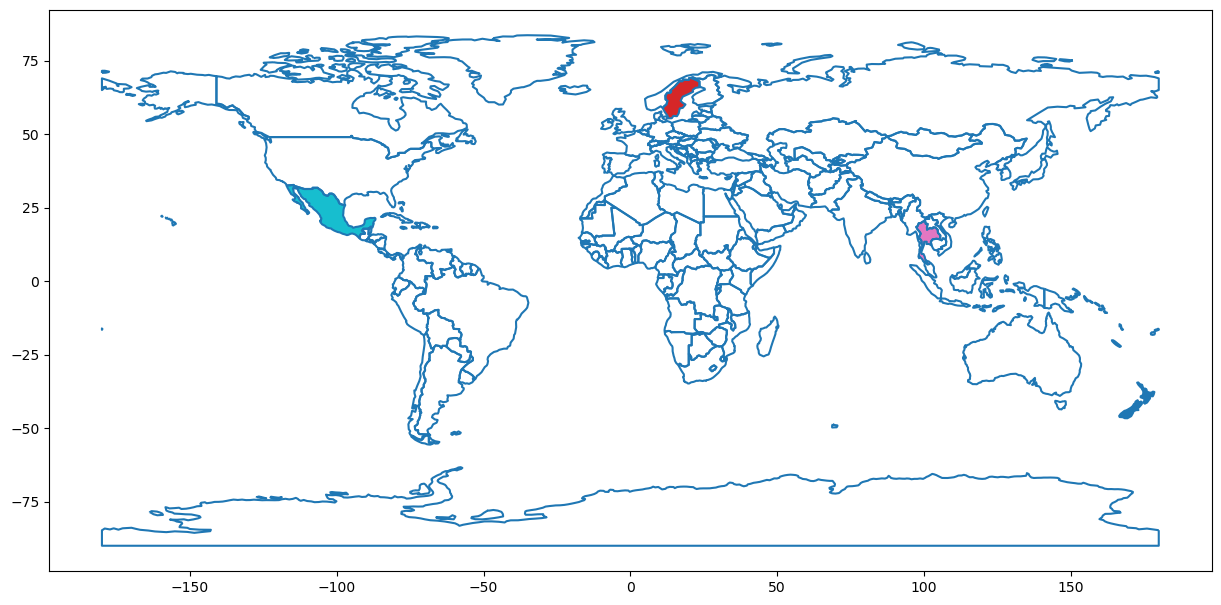

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 2: Load the data
data = pd.read_csv('credit_ratings_country_all.csv')

# Selecting the most recent rating for each country
latest_ratings = data.sort_values('Date').drop_duplicates('Country', keep='last')

# Step 3: Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the ratings data
world = world.merge(latest_ratings, left_on='name', right_on='Country', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Rating', ax=ax, legend=True,
           legend_kwds={'label': "Credit Rating by Country",
                        'orientation': "horizontal"})
plt.show()


In [1]:
import pandas as pd
import requests

baseUrl = "https://tradingeconomics.com/"

# Define user-agent header to trick website into thinking we're a genuine user
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

def teMarkets(datasets):
    """
        Retrieves market data from www.tradingeconomics.com, given an input target dataset.
        Note the data is extracted from the website's HTML, not the actual API, so may be prone to breaking.

        Inputs
        * list of strings representing the target market datasets, eg. ['bonds', 'stocks']
        * strings must be one of the following options:
            - 'bonds'
            - 'commodities'
            - 'crypto'
            - 'currencies'
            - 'stocks'

        Returns a dictionary where the keys are equal to the input strings and the values are either a
        dataframe object if successful or a string of the error code/message if not.

        Note
        * When calling bonds, the data is for government 10Y notes.
        * Duplicates are removed.
    """

    # Initialise the return dictionary
    returnDict = {}

    # Initialise a session object
    session = requests.Session()

    # If statements which append to the return dictionary if True
    if "bonds" in datasets:
        url = "{}{}".format(baseUrl, "bonds")
        request = requests.get(url, headers=headers)
        if request.status_code == 200:
            try:
                tables = pd.read_html(request.text)
                for index, table in enumerate(tables):
                    region = table.columns[1]
                    table = table.rename(columns={table.columns[0]:"Region", region: "Bond"})
                    table["Bond"] = table["Bond"].apply(lambda x: "{} 10Y".format(x))
                    table["Region"] = [region for i in range(len(table))]
                    
                    if index == 0:
                        bondsDf = table
                    else:
                        bondsDf = pd.concat([bondsDf, table])
                bondsDf = bondsDf.drop_duplicates(subset="Bond", keep='last', ignore_index=True)
                returnDict["bonds"] = bondsDf

            except:
                returnDict["bonds"] = "Successful request but error loading data..."
        else:
            returnDict["bonds"] = "Request error: {}".format(request.status_code)

    if "commodities" in datasets:
        url = "{}{}".format(baseUrl, "commodities")
        request = requests.get(url, headers=headers)
        if request.status_code == 200:
            try:
                tables = pd.read_html(request.text)
                for index, table in enumerate(tables):
                    category = table.columns[0]
                    table["Category"] = [category for i in range(len(table))]
                    table = table.rename(columns={category: "Commodity"})
                    
                    if index == 0:
                        commodityDf = table
                    else:
                        commodityDf = pd.concat([commodityDf, table])
                commodityDf = commodityDf.drop_duplicates(subset="Commodity", keep="last", ignore_index=True)
                returnDict["commodities"] = commodityDf
            except:
                returnDict["commodities"] = "Successful request but error loading data"
        else:
            returnDict["commodities"] = "Request error: {}".format(request.status_code)

    if "crypto" in datasets:
        url = "{}{}".format(baseUrl, "crypto")
        request = session.get(url, headers=headers)
        if request.status_code == 200:
            try:
                tables = pd.read_html(request.text)
                for index, table in enumerate(tables):
                    category = table.columns[0]
                    table["Category"] = [category for i in range(len(table))]
                    table = table.rename(columns={table.columns[0]: "Product"})

                    if index == 0:
                        cryptoDf = table
                    else:
                        cryptoDf = pd.concat([cryptoDf, table], ignore_index=True)
                returnDict["crypto"] = cryptoDf
            except:
                returnDict["crypto"] = "Sucessful request but error loading data..."
        else:
            returnDict["crypto"] = "Request error: {}".format(request.status_code)

    if "currencies" in datasets:
        url = "{}{}".format(baseUrl, "currencies")
        request = requests.get(url, headers=headers)
        if request.status_code == 200:
            try:
                tables = pd.read_html(request.text)
                for index, table in enumerate(tables):
                    region = table.columns[1]
                    table = table.rename(columns={table.columns[0]: "Region", table.columns[1]: "CurrencyPair"})
                    table.Region = [region for i in range(len(table))]

                    if index == 0:
                        currencyDf = table
                    else:
                        currencyDf = pd.concat([currencyDf, table])
                currencyDf = currencyDf.drop_duplicates(subset="CurrencyPair", keep='last', ignore_index=True)
                returnDict["currencies"] = currencyDf
            except:
                returnDict["currencies"] = "Successful request but error loading data..."
        else:
            returnDict["currencies"] = "Request error: {}".format(request.status_code)
 
    if "stocks" in datasets:
        url = "{}{}".format(baseUrl, "stocks")
        request = requests.get(url, headers=headers)
        if request.status_code == 200:
            try:
                tables = pd.read_html(request.text)
                for index, table in enumerate(tables):
                    region = table.columns[1]
                    table = table.rename(columns={table.columns[0]: "Region", table.columns[1]: "Index"})
                    table.Region = [region for i in range(len(table))]

                    if index == 0:
                        stocksDf = table
                    else:
                        stocksDf = pd.concat([stocksDf, table])
                stocksDf = stocksDf.drop_duplicates(subset="Index", keep='last', ignore_index=True)
                returnDict["stocks"] = stocksDf
            except:
                returnDict["stocks"] = "Successful request but error loading data..."
        else:
            returnDict["stocks"] = "Request error: {}".format(request.status_code)
    return returnDict

# EXAMPLE
if __name__ == "__main__":
    data = teMarkets(["crypto", "stocks","commodities"])


C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_2732\1683100861.py:69: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(request.text)
C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_2732\1683100861.py:91: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string,

In [2]:
data["crypto"].head()

,Product,Price,Day,%,Weekly,Monthly,YoY,MarketCap,Date,Category
0,Bitcoin,64206.00000,139.0000,0.22%,0.53%,-7.38%,121.77%,"$1,214,280M",May/06,Crypto
1,Ether,3148.70000,11.0000,0.35%,-2.19%,-7.43%,63.94%,"$374,373M",May/06,Crypto
2,Binance,591.70000,1.0000,0.17%,-0.54%,1.72%,83.13%,"$96,140M",May/06,Crypto
3,Cardano,0.45795,0.0005,-0.10%,0.10%,-22.15%,20.70%,"$15,428M",May/06,Crypto
4,Solana,147.39000,1.6355,1.12%,7.09%,-17.90%,562.60%,"$45,456M",May/06,Crypto


In [3]:
data["stocks"].head()

,Region,Index,Price,Day,%,Weekly,Monthly,YoY,Date,Unnamed: 9
0,Europe,GB100,8213.0,41.0,0.51%,0.91%,2.98%,6.63%,May/03,NaN
1,Europe,DE40,18068.0,67.0,0.37%,-0.28%,-1.37%,13.26%,May/06,NaN
2,Europe,FR40,7958.0,43.0,0.54%,-1.62%,-2.38%,8.40%,May/03,NaN
3,Europe,IT40,33629.0,107.0,-0.32%,-1.81%,-2.40%,26.09%,May/03,NaN
4,Europe,ES35,10855.0,17.0,-0.16%,-2.69%,-2.13%,20.03%,May/03,NaN


In [4]:
data["commodities"].head()

,Commodity,Price,Day,%,Weekly,Monthly,YoY,Date,Category
0,Crude Oil USD/Bbl,78.3890,0.3990,0.51%,-5.24%,-9.30%,7.66%,May/06,Energy
1,Brent USD/Bbl,83.2430,0.4230,0.51%,-4.54%,-7.90%,8.09%,May/06,Energy
2,Natural gas USD/MMBtu,2.1538,0.0038,0.18%,6.10%,15.95%,-3.76%,May/06,Energy
3,Gasoline USD/Gal,2.5521,0.0047,-0.18%,-7.22%,-7.20%,3.68%,May/06,Energy
4,Heating Oil USD/Gal,2.4406,0.0006,0.02%,-3.75%,-10.56%,2.65%,May/06,Energy


# EVENTS

https://docs.tradingeconomics.com/economic_calendar/snapshot/


In [5]:
import requests
api_key = '52907c12211a4c4:tb36co5d1u5rv2l'
url = f'https://api.tradingeconomics.com/calendar?c={api_key}'
data = requests.get(url).json()
print(data)


import tradingeconomics as te
te.login('52907c12211a4c4:tb36co5d1u5rv2l')
te.getCalendarData()

[{'CalendarId': '341836', 'Date': '2024-05-06T00:00:00', 'Country': 'Thailand', 'Category': 'Holidays', 'Event': 'Coronation Day', 'Reference': '', 'ReferenceDate': None, 'Source': '', 'SourceURL': '', 'Actual': '', 'Previous': '', 'Forecast': '', 'TEForecast': '', 'URL': '/thailand/holidays', 'DateSpan': '0', 'Importance': 1, 'LastUpdate': '2023-11-22T12:30:03.12', 'Revised': '', 'Currency': '', 'Unit': '', 'Ticker': 'HOLIDAYSTHAILAND', 'Symbol': ''}, {'CalendarId': '350787', 'Date': '2024-05-06T06:30:00', 'Country': 'Sweden', 'Category': 'Services PMI', 'Event': 'Services PMI', 'Reference': 'Apr', 'ReferenceDate': '2024-04-30T00:00:00', 'Source': 'Swedbank', 'SourceURL': 'https://www.swedbank.com/', 'Actual': '', 'Previous': '53.9', 'Forecast': '', 'TEForecast': '53.2', 'URL': '/sweden/services-pmi', 'DateSpan': '0', 'Importance': 1, 'LastUpdate': '2024-05-03T07:15:54.15', 'Revised': '', 'Currency': '', 'Unit': '', 'Ticker': 'SWEDENSERPMI', 'Symbol': 'SWEDENSERPMI'}, {'CalendarId': '

[{'CalendarId': '339360',
  'Date': '2024-05-08T07:30:00',
  'Country': 'Sweden',
  'Category': 'Interest Rate',
  'Event': 'Riksbank Rate Decision',
  'Reference': '',
  'ReferenceDate': '2024-05-08T00:00:00',
  'Source': 'Sveriges Riksbank',
  'SourceURL': 'https://www.riksbank.se/',
  'Actual': '',
  'Previous': '4%',
  'Forecast': '',
  'TEForecast': '4%',
  'URL': '/sweden/interest-rate',
  'DateSpan': '0',
  'Importance': 2,
  'LastUpdate': '2024-04-26T14:28:57.28',
  'Revised': '',
  'Currency': '',
  'Unit': '%',
  'Ticker': 'SWRRATEI',
  'Symbol': 'SWRRATEI'},
 {'CalendarId': '364148',
  'Date': '2024-05-08T06:00:00',
  'Country': 'Sweden',
  'Category': 'House Price Index MoM',
  'Event': 'House Price Index MoM',
  'Reference': 'Apr',
  'ReferenceDate': '2024-04-30T00:00:00',
  'Source': 'Statistics Sweden',
  'SourceURL': 'https://www.scb.se/',
  'Actual': '',
  'Previous': '-2%',
  'Forecast': '',
  'TEForecast': '-1.0%',
  'URL': '/sweden/house-price-index-mom',
  'DateSpa

In [6]:
# GDP

In [9]:
# To get historical data by specific country, indicator, start date and end date
mydata = te.getHistoricalData(country='mexico',  indicator='gdp', initDate='2015-01-01', endDate='2015-12-31', output_type='df')
print(mydata)
print("===============================================================================================================")


  Country Category             DateTime    Value Frequency  \
0  Mexico      GDP  2022-12-31T00:00:00  1465.85    Yearly   
1  Mexico      GDP  2021-12-31T00:00:00  1312.56    Yearly   
2  Mexico      GDP  2020-12-31T00:00:00  1120.74    Yearly   

  HistoricalDataSymbol           LastUpdate  
0             WGDPMEXI  2024-01-02T15:00:00  
1             WGDPMEXI  2024-01-02T15:00:00  
2             WGDPMEXI  2024-01-02T15:00:00  


In [8]:
import pandas as pd
import tradingeconomics as te
te.login('guest:guest')

## Without a client key only a small sample of data will be given.

## Putting country name or indicator name in square brackets [] will result, by default
## in the dictionary type for several countries and indicators.
## EXE: country=['mexico', 'sweden']

## With no output_type defined, the result will be of the dictionary type.
## Use output_type='df' to display in pandas dataframe. 


# To get historical data by specific country, indicator, start date and end date
mydata = te.getHistoricalData(country='china',  indicator='gdp', initDate='2015-01-01', endDate='2015-12-31', output_type='df')
print(mydata)
print("===============================================================================================================")


# # To get a list of discontinued indicators series with multiple countries.
# mydata = te.getDiscontinuedIndicator(country=['united states', 'china'], output_type='df')
# print(mydata)
# print("===============================================================================================================")

# To get your data into a csv file
df = pd.DataFrame(mydata)
df
# path = r'python\EXAMPLES\Indicators\indicatorsHistoricalEx.csv'
# df.to_csv(path, index=False, header=True, sep='|')

# If you want the code into an html table format, you can use the example below in your html projects
# print(mydata.to_html())


HTTP Error 403: No Access to this feature.
None


""
